In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data=pd.read_csv("Breast_cancer_data.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [ ]:
data=data.drop('mean_texture',axis=1)
data['diagnosis'].replace(to_replace=True, value=1, inplace=True)
data['diagnosis'].replace(to_replace=False,  value=0, inplace=True)
df_dummies=pd.get_dummies(data)
df_dummies.head()
#Churn dataset study case
Y_churn=df_dummies['diagnosis'].values
X_churn=df_dummies.drop('diagnosis',axis=1)

In [ ]:
## No Imbalance Handling
# Define model
model2_ori=RandomForestClassifier(criterion='entropy')
# Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv2_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores2_ori = cross_validate(model2_ori, X_churn, Y_churn, scoring=scoring, cv=cv2_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores2_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores2_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores2_ori['test_recall_macro']))


Mean Accuracy: 0.8975
Mean Precision: 0.8962
Mean Recall: 0.8854


In [ ]:
# With SMOTE-Tomek Links method
# Define model
model2=RandomForestClassifier(criterion='entropy')
# Define SMOTE-Tomek Links
resample2=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# Define pipeline
pipeline2=Pipeline(steps=[('r', resample2), ('m', model2)])
# Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv2=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores2 = cross_validate(pipeline2, X_churn, Y_churn, scoring=scoring, cv=cv2, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores2['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores2['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores2['test_recall_macro']))

Mean Accuracy: 0.8928
Mean Precision: 0.8889
Mean Recall: 0.8837


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns

In [ ]:
df = pd.read_csv('Breast_cancer_data.csv')

In [ ]:
class_dist=df['diagnosis'].value_counts()
print(class_dist)

1    357
0    212
Name: diagnosis, dtype: int64


In [ ]:
X = df.drop(columns=['mean_texture'])
y = df['diagnosis']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.3,stratify=y)

Accuracy  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00       107

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



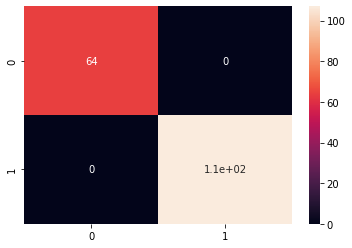

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
from imblearn.over_sampling import SMOTE 

sm = SMOTE(sampling_strategy=1.0,k_neighbors=5,random_state = 100) 
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 250
Before OverSampling, counts of label '0': 148 

After OverSampling, the shape of train_X: (500, 5)
After OverSampling, the shape of train_y: (500,) 

After OverSampling, counts of label '1': 250
After OverSampling, counts of label '0': 250


Accuracy  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00       107

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



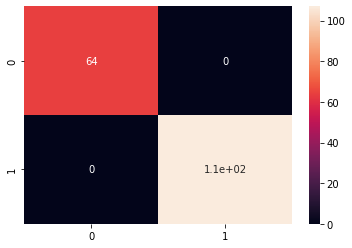

In [ ]:
lr = LogisticRegression() 
lr.fit(X_train_res, y_train_res.ravel()) 
predictions = lr.predict(x_test) 
  
print('Accuracy ',accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
data=pd.read_csv("Breast_cancer_data.csv")
data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


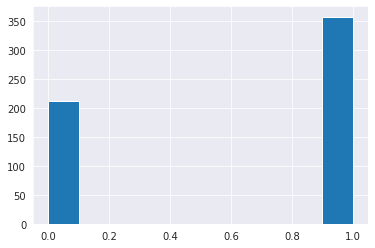

In [ ]:
data["diagnosis"].hist()

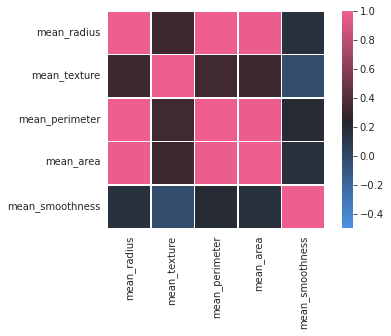

In [ ]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [ ]:
data = data[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


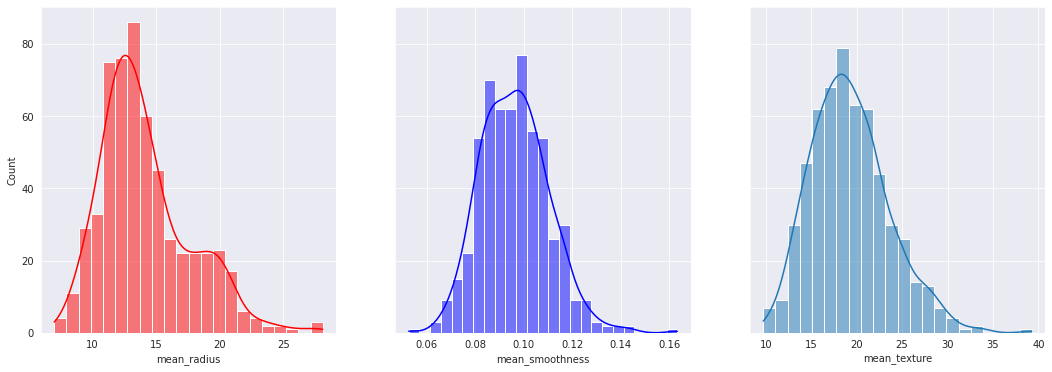

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="mean_texture", kde=True)

In [ ]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [ ]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [ ]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[36  4]
 [ 0 74]]
0.9736842105263158


In [ ]:
data["cat_mean_radius"] = pd.cut(data["mean_radius"].values, bins = 3, labels = [0,1,2])
data["cat_mean_texture"] = pd.cut(data["mean_texture"].values, bins = 3, labels = [0,1,2])
data["cat_mean_smoothness"] = pd.cut(data["mean_smoothness"].values, bins = 3, labels = [0,1,2])

data = data.drop(columns=["mean_radius", "mean_texture", "mean_smoothness"])
data = data[["cat_mean_radius",	"cat_mean_texture",	"cat_mean_smoothness", "diagnosis"]]
data.head(10)

,cat_mean_radius,cat_mean_texture,cat_mean_smoothness,diagnosis
0,1,0,1,0
1,1,0,0,0
2,1,1,1,0
3,0,1,2,0
4,1,0,1,0
5,0,0,2,0
6,1,1,1,0
7,0,1,1,0
8,0,1,2,0
9,0,1,1,0


In [ ]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

In [ ]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[38  2]
 [ 5 69]]
0.9517241379310345


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('Breast_cancer_data.csv')
data.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [ ]:
data.shape

(569, 6)

In [ ]:
data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [ ]:
data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [ ]:
data.values

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, 8.581e+02, 8.455e-02, 0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, 1.265e+03, 1.178e-01, 0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02, 1.000e+00]])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
data.describe(include='all')

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [ ]:
X=data.iloc[:,:4]
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area
0,17.99,10.38,122.80,1001.0
1,20.57,17.77,132.90,1326.0
2,19.69,21.25,130.00,1203.0
3,11.42,20.38,77.58,386.1
4,20.29,14.34,135.10,1297.0


In [ ]:
y=data.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [ ]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ],
       [ 1.82982061, -0.35363241,  1.68595471,  1.90870825],
       [ 1.57988811,  0.45618695,  1.56650313,  1.55888363],
       [-0.76890929,  0.25373211, -0.59268717, -0.76446379]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)
y_test.shape

(171,)

In [ ]:
knnmodel=KNeighborsClassifier(n_neighbors=3)

In [ ]:
knnmodel.fit(X_train,y_train)

In [ ]:
y_predict1=knnmodel.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc=accuracy_score(y_test,y_predict1)
acc

0.8771929824561403

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values,y_predict1)
cm

array([[ 49,  14],
       [  7, 101]])

In [ ]:
cm1=pd.DataFrame(data=cm,index=['0','1'],columns=['0','1'])
cm1

,0,1
0,49,14
1,7,101


In [ ]:
prediction_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict1'])


In [ ]:
prediction_output.transpose()

,y_test,y_predict1
0,1,1
1,0,1
2,1,1
3,0,0
4,0,1
...,...,...
166,0,0
167,0,0
168,0,0
169,1,1


In [ ]:
prediction_output.iloc[0,:].value_counts()

1    108
0     63
Name: y_test, dtype: int64

In [ ]:
Ks=50
mean_acc=np.zeros((Ks-1))


#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

In [ ]:
print(mean_acc)

[0.87134503 0.85964912 0.87719298 0.85964912 0.87134503 0.85964912
 0.84795322 0.87134503 0.85964912 0.86549708 0.86549708 0.86549708
 0.86549708 0.86549708 0.86549708 0.87134503 0.87134503 0.85964912
 0.86549708 0.85964912 0.85964912 0.85964912 0.86549708 0.87134503
 0.86549708 0.86549708 0.86549708 0.86549708 0.86549708 0.85964912
 0.87134503 0.85964912 0.86549708 0.85380117 0.86549708 0.86549708
 0.86549708 0.86549708 0.87134503 0.86549708 0.86549708 0.86549708
 0.87134503 0.86549708 0.87134503 0.87134503 0.87134503 0.87134503
 0.87134503]


In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8771929824561403 with k= 3


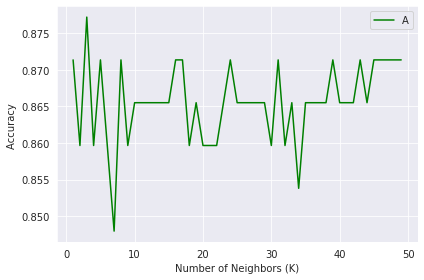

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
dataset=datasets.load_breast_cancer()
x =dataset.data;y=dataset.target

In [ ]:
x_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20,random_state = 42);

In [ ]:
estimator = []
estimator.append(('LR',
LogisticRegression(solver ='lbfgs',
multi_class ='multinomial',
max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

In [ ]:
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
Y_prediction = vot_soft.predict(X_test)

In [ ]:
score = accuracy_score(y_test, Y_prediction)
print("Soft Voting Score % d" % score)


Soft Voting Score  1


In [ ]:
import pandas as pd
data=pd.read_csv("Breast_cancer_data.csv")
data.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
data.isnull().sum()

mean_radius        0
mean_perimeter     0
mean_area          0
mean_smoothness    0
dtype: int64

In [ ]:
X = data.drop("diagnosis",axis="columns")
y = data.diagnosis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]




array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633],
       [ 1.82982061, -0.35363241,  1.68595471,  1.90870825, -0.82696245],
       [ 1.57988811,  0.45618695,  1.56650313,  1.55888363,  0.94221044]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)
X_train.shape


(426, 5)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
data=pd.read_csv("Breast_cancer_data.csv") 
data.head()
data.drop('mean_texture',axis=1,inplace=True)
data.head()
y=data['diagnosis']
x=data
x.drop('diagnosis',axis=1,inplace=True)
x.columns
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,x_test.shape)
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets 

model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test) 
print(metrics.confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))







(455, 4) (114, 4)
[[38  5]
 [ 5 66]]
Accuracy: 0.9122807017543859


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
data=pd.read_csv("Breast_cancer_data.csv") 
data.head()
data.drop('mean_texture',axis=1,inplace=True)
data.head()
y=data['diagnosis']
x=data
x.drop('diagnosis',axis=1,inplace=True)
x.columns
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,x_test.shape)
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test) 
print(metrics.confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))




(455, 4) (114, 4)
[[27  9]
 [ 8 70]]
Accuracy: 0.8508771929824561


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
data=pd.read_csv("Breast_cancer_data.csv") 
data.head()
y=data['diagnosis']
x=data
x.drop('diagnosis',axis=1,inplace=True)
x.columns
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,x_test.shape)
clf=SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


(455, 5) (114, 5)
Accuracy: 0.8947368421052632


In [ ]:
import pandas as pd
import numpy as np

In [ ]:

df = pd.read_csv("Breast_cancer_data.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
data=pd.read_csv("Breast_cancer_data.csv") 
data.head()
y=data['diagnosis']
x=data
x.drop('diagnosis',axis=1,inplace=True)
x.columns
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,x_test.shape)
classifier = BaggingClassifier(base_estimator = KNeighborsClassifier(),
                               max_samples = 10,
                               n_estimators = 100)
model=classifier.fit(x_train,y_train)
y_pred = model.predict(x_test) 
print(metrics.confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))



(455, 5) (114, 5)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[[33 16]
 [ 0 65]]
Accuracy: 0.8596491228070176
